 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_datareader import data as web

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("../Resources/whale_returns.csv")
# YOUR CODE HERE
whale_df = pd.read_csv(whale_returns_csv, parse_dates=True, infer_datetime_format=True, index_col = 'Date')
whale_df = whale_df.sort_index(axis = 0)

# Discovery
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
whale_df.describe(include='all')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.000179,-0.000203,-0.000081,0.000501
std,0.007842,0.006977,0.010824,0.012831
min,-0.032711,-0.032099,-0.139820,-0.066505
25%,-0.003594,-0.003961,-0.004746,-0.005515
50%,0.000467,0.000000,0.000232,0.000617
75%,0.004292,0.003567,0.005176,0.007516
max,0.042977,0.029338,0.080705,0.061341


In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
# YOUR CODE HERE
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [6]:
whale_df.head(3)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algorithmic returns
algo_returns_csv = Path("../Resources/algo_returns.csv")
# YOUR CODE HERE
algo_df = pd.read_csv(algo_returns_csv, parse_dates=True, infer_datetime_format=True, index_col='Date')
algo_df = algo_df.sort_index(axis = 0)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [141]:
# Count nulls
# YOUR CODE HERE
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [142]:
# Drop nulls
# YOUR CODE HERE
algo_df.dropna(inplace = True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [143]:
algo_df.head(10)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
2014-06-12,-0.000028,-0.003841
2014-06-13,0.001917,-0.000814
2014-06-16,0.001084,0.001831
2014-06-17,0.000922,0.006870


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_df = pd.read_csv(sp500_history_csv, parse_dates=True, infer_datetime_format=True, index_col='Date')
sp500_df = sp500_df.sort_index(axis = 0)

sp500_df.head(3)

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99


In [11]:
# Check Data Types
# YOUR CODE HERE
sp500_df.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
# YOUR CODE HERE
sp500_df['Close'] = sp500_df['Close'].str.replace("$","")
sp500_df['Close'] = sp500_df['Close'].astype(float)   
# sp500_df.dtypes
# sp500_df.head(5)
sp500_df.index.min()
# type(sp500_df)
# sp500_df.to_csv('sp500.csv')

Timestamp('2012-10-01 00:00:00')

In [13]:
type(sp500_df)
sp500_df.to_csv('sp500.csv')

In [14]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_returns_df = sp500_df.pct_change()
sp500_returns_df.index.min()
sp500_returns_df.to_csv('returns.csv')

In [17]:
# Drop nulls
# YOUR CODE HERE
sp500_returns_df.dropna(inplace = True)
sp500_returns_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [18]:
# Rename Column
# YOUR CODE HERE
sp500_returns_df.rename(columns = {'Close': 'S&P 500'}, inplace = True)
sp500_returns_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [22]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
from functools import reduce

data_frames = [whale_df, algo_df, sp500_returns_df]
merged_df = reduce(lambda left, right: pd.merge(left, right, on='Date', how = 'outer'), data_frames)

merged_df.dropna(inplace = True)
merged_df.to_csv('merged.csv')
merged_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


In [23]:
merged_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

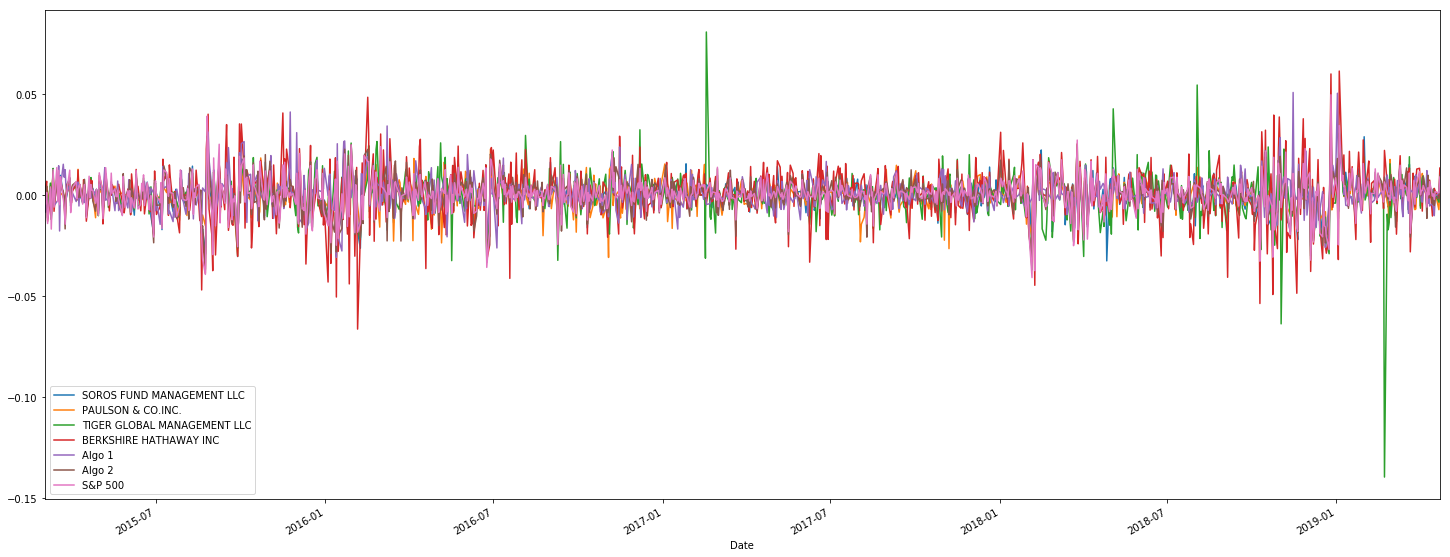

In [24]:
# Plot daily returns
# YOUR CODE HERE
merged_df.plot(subplots = False, figsize = (25,10))

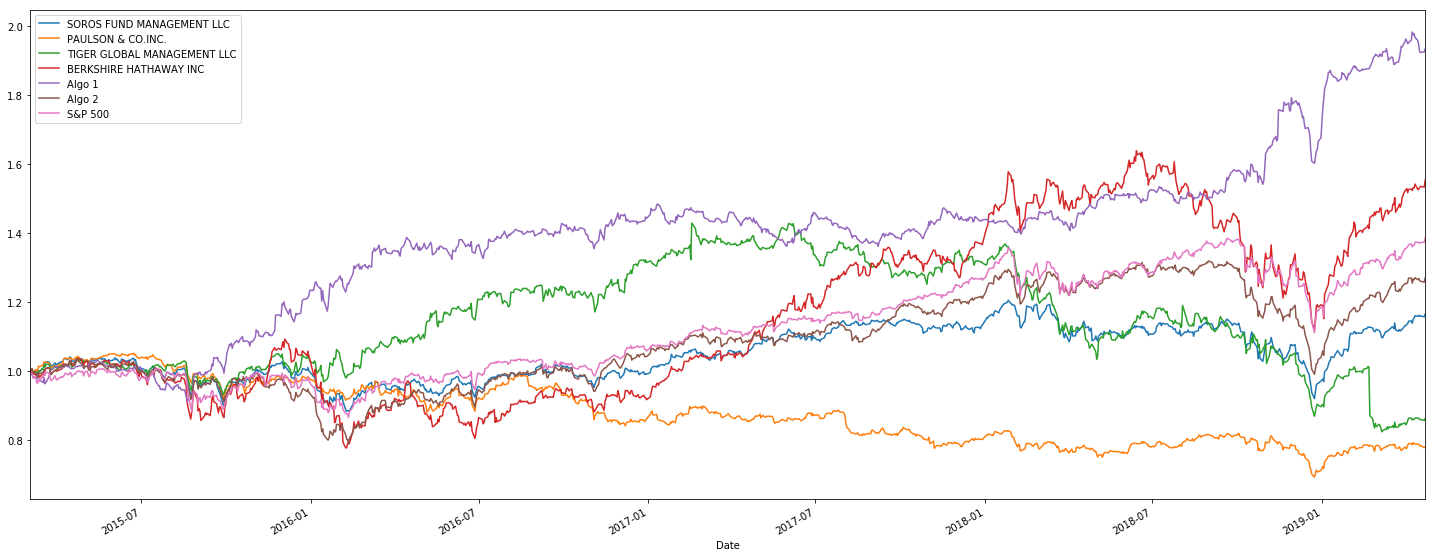

In [25]:
# Plot cumulative returns
# YOUR CODE HERE
cum_returns_df = (1 + merged_df).cumprod()
cum_returns_df.plot(subplots = False, figsize = (25,10))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

Text(0.5, 1.0, 'Portfolio Risk')

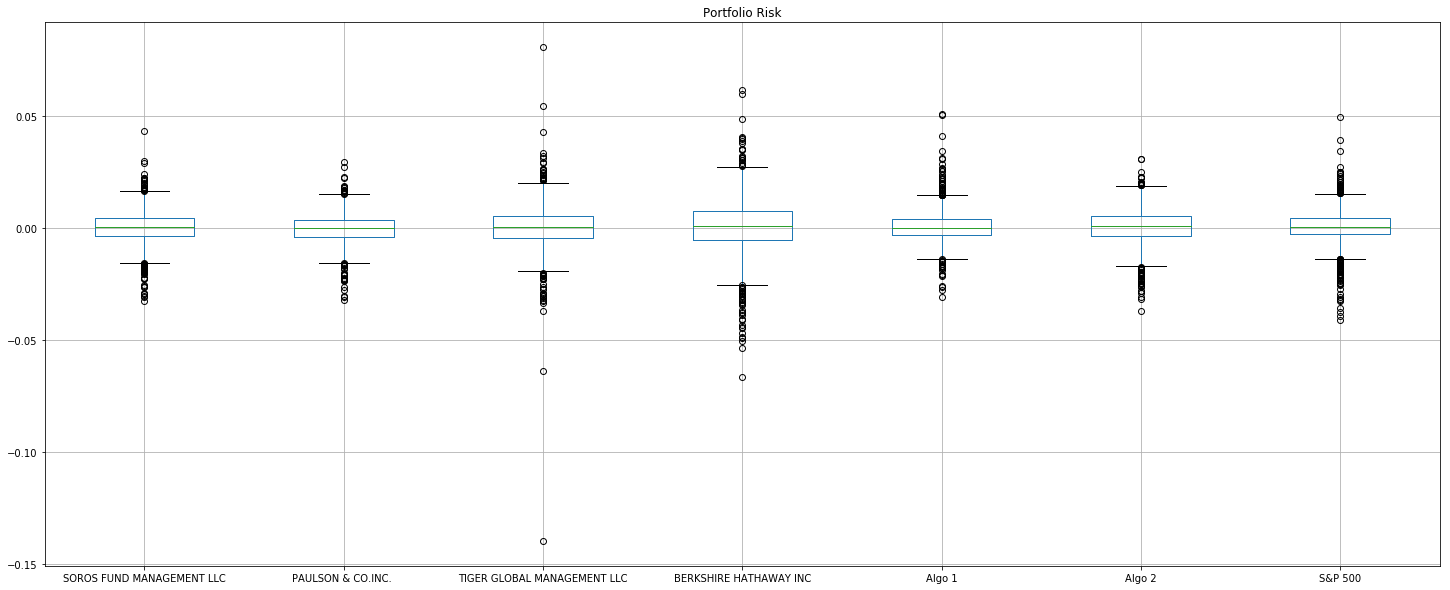

In [26]:
# Box plot to visually show risk
# YOUR CODE HERE
bplot = merged_df.boxplot(figsize = (25,10))
bplot.axes.set_title("Portfolio Risk",
                    fontsize=12)

In [27]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
merged_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [28]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
merged_std_df = merged_df.std()
type(merged_std_df)
merged_std_df > 0.008554

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [29]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
merged_std_df * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

## Rolling Statistics
Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

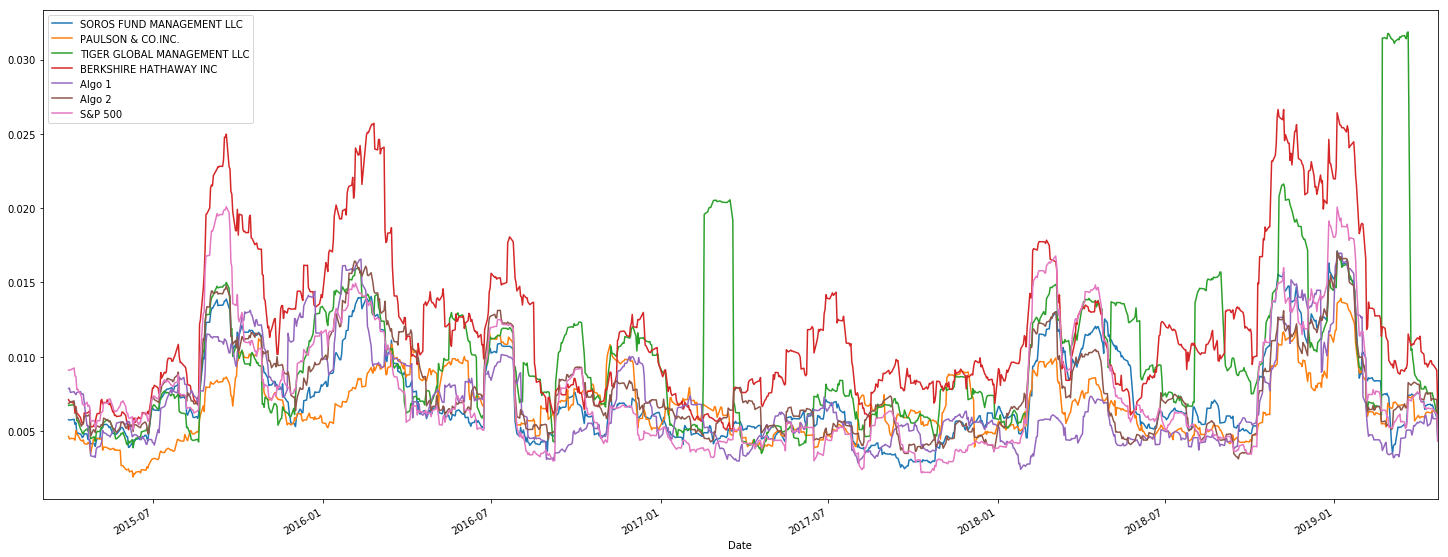

In [30]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
merged_df.rolling(window=21).std().plot(figsize = (25,10))

In [31]:
# Correlation
# YOUR CODE HERE
merged_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


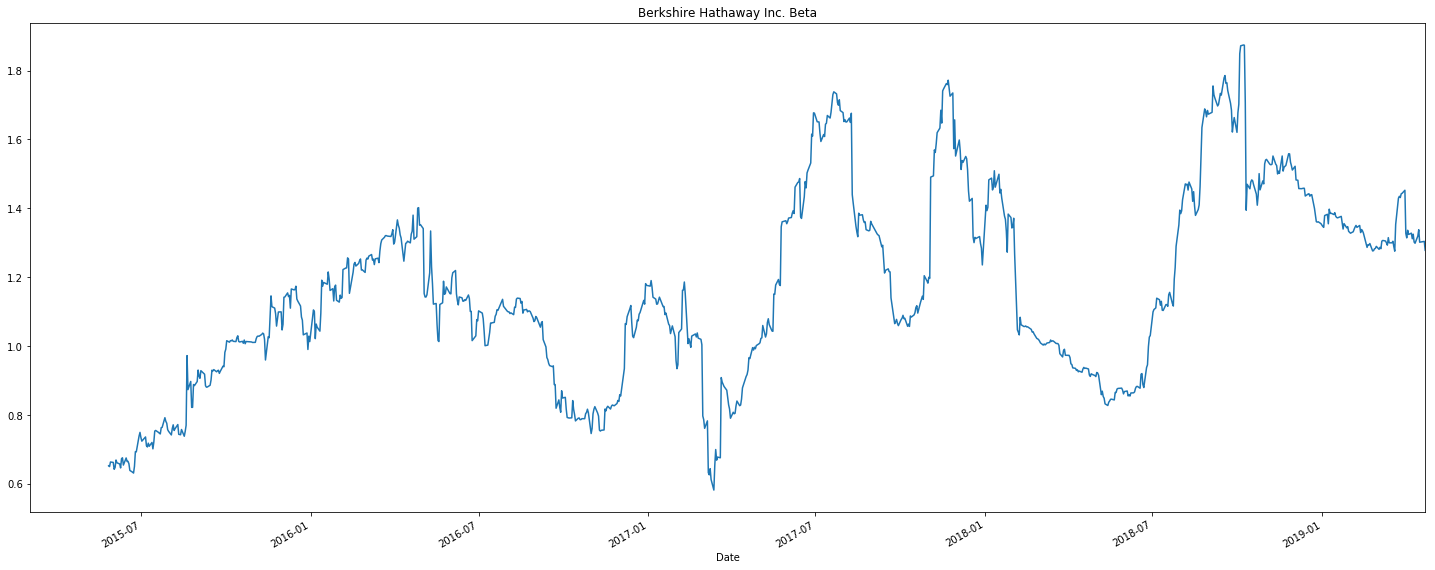

In [32]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
# merged_df.drop(['covariance', 'variance', 'beta'], axis = 1, inplace = True)

merged_df['rolling_covariance'] = merged_df['BERKSHIRE HATHAWAY INC'].rolling(window = 60).cov(merged_df['S&P 500'])
merged_df['rolling_variance'] = merged_df['S&P 500'].rolling(window = 60).var()
merged_df['rolling_beta'] = merged_df['rolling_covariance']/merged_df['rolling_variance']

merged_df['rolling_beta'].plot(figsize = (25,10), title = 'Berkshire Hathaway Inc. Beta')

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

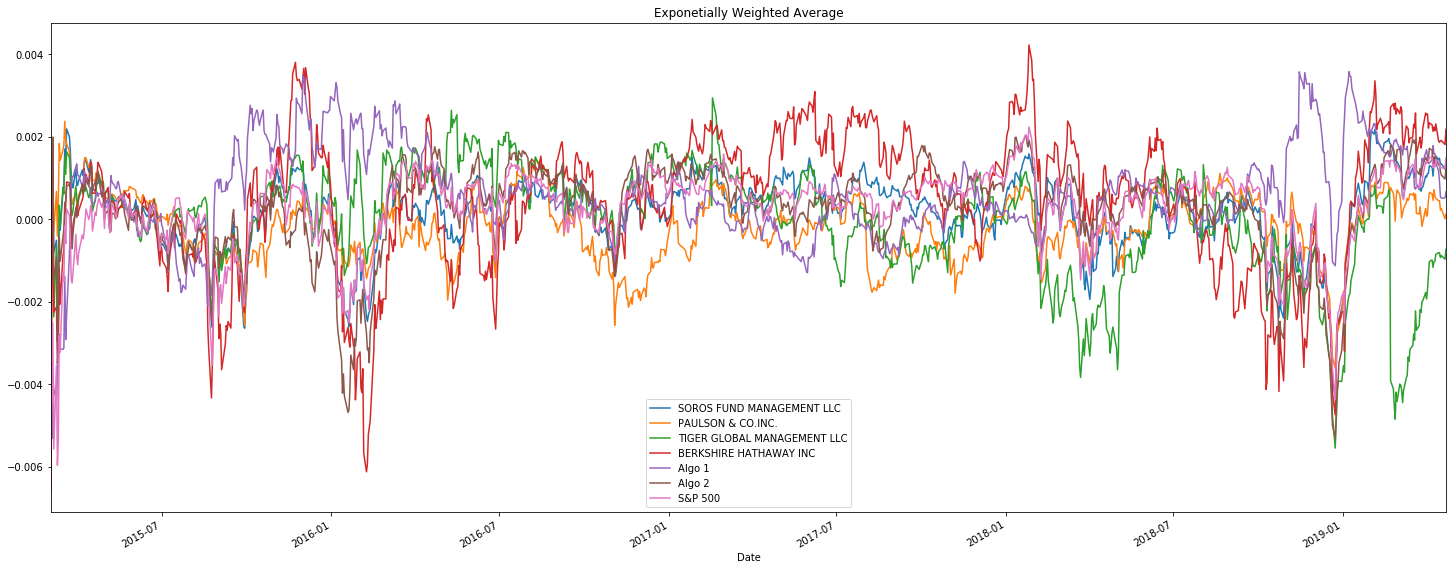

In [34]:
# (OPTIONAL) YOUR CODE HERE
merged_subset = merged_df[['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'S&P 500']]

merged_subset.ewm(halflife=21, adjust = True).mean().plot(figsize = (25,10), title = 'Exponetially Weighted Average')

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [36]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratio = (merged_subset.mean() * 252) / (merged_subset.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

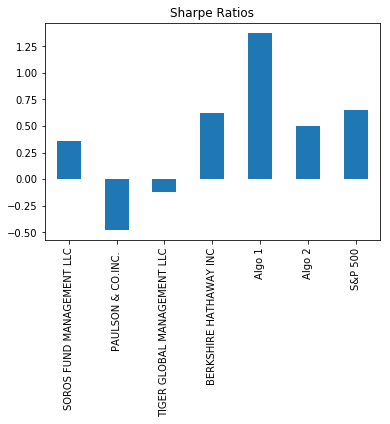

In [38]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratio.plot(kind = 'bar', title = "Sharpe Ratios")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [39]:
# Read the first stock
# YOUR CODE HERE
target_csv = Path("../Resources/target.csv")
target_df = pd.read_csv(target_csv, parse_dates=True, infer_datetime_format=True, index_col = 'Date')
target_df = target_df.sort_index(axis = 0)
target_df.head()
drop_columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume'] 
target_df.drop(drop_columns, axis = 1, inplace = True)
target_df.head()


,Symbol,Close
Date,,
2018-09-14,TGT,87.940002
2018-09-17,TGT,87.279999
2018-09-18,TGT,87.680000
2018-09-19,TGT,87.160004
2018-09-20,TGT,87.379997


In [40]:
# Read the second stock
# YOUR CODE HERE
import datetime
# Reading the close prices of target
walmart_csv = Path("../Resources/walmart.csv")
walmart_df = pd.read_csv(walmart_csv, parse_dates=True, infer_datetime_format=True, index_col = 'Date')
walmart_df = walmart_df.sort_index(axis = 0)
walmart_df.head()
drop_columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume'] 
walmart_df.drop(drop_columns, axis = 1, inplace = True)
walmart_df.head()

,Symbol,Close
Date,,
2018-09-14,WMT,94.589996
2018-09-17,WMT,94.820000
2018-09-18,WMT,95.430000
2018-09-19,WMT,95.239998
2018-09-20,WMT,95.750000


In [41]:
# Read the third stock
# YOUR CODE HERE
# Reading the close prices of target
kohls_csv = Path("../Resources/kohls.csv")
kohls_df = pd.read_csv(kohls_csv, parse_dates=True, infer_datetime_format=True, index_col = 'Date')
kohls_df = kohls_df.sort_index(axis = 0)
kohls_df.head()
drop_columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume'] 
kohls_df.drop(drop_columns, axis = 1, inplace = True)
kohls_df.head()


,Symbol,Close
Date,,
2018-09-14,KSS,80.839996
2018-09-17,KSS,79.260002
2018-09-18,KSS,79.599998
2018-09-19,KSS,79.519997
2018-09-20,KSS,76.949997


In [42]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
frames = [target_df, walmart_df, kohls_df]
concat_df = pd.concat(frames, axis = 0, sort = False)
concat_df.head()
concat_df.tail()
concat_df.shape
type(concat_df)
concat_df.columns
concat_df.head()

,Symbol,Close
Date,,
2018-09-14,TGT,87.940002
2018-09-17,TGT,87.279999
2018-09-18,TGT,87.680000
2018-09-19,TGT,87.160004
2018-09-20,TGT,87.379997


In [44]:
# Reset the index
# YOUR CODE HERE
concat_df.reset_index().head()

,Date,Symbol,Close
0,2018-09-14,TGT,87.940002
1,2018-09-17,TGT,87.279999
2,2018-09-18,TGT,87.680000
3,2018-09-19,TGT,87.160004
4,2018-09-20,TGT,87.379997


In [45]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
# YOUR CODE HERE
concat_pivot_df = pd.pivot_table(concat_df, index = ['Date'], columns = ['Symbol'])

concat_pivot_df.head()
concat_pivot_df = concat_pivot_df.sum(level = 1, axis = 1)
concat_pivot_df.head()

Symbol,KSS,TGT,WMT
Date,,,
2018-09-14,80.839996,87.940002,94.589996
2018-09-17,79.260002,87.279999,94.820000
2018-09-18,79.599998,87.680000,95.430000
2018-09-19,79.519997,87.160004,95.239998
2018-09-20,76.949997,87.379997,95.750000


In [46]:
# Drop Nulls
# YOUR CODE HERE
concat_pivot_returns_df = concat_pivot_df.pct_change()
concat_pivot_returns_df.head()

concat_pivot_returns_df.dropna(inplace = True)
concat_pivot_returns_df.head()

Symbol,KSS,TGT,WMT
Date,,,
2018-09-17,-0.019545,-0.007505,0.002432
2018-09-18,0.004290,0.004583,0.006433
2018-09-19,-0.001005,-0.005931,-0.001991
2018-09-20,-0.032319,0.002524,0.005355
2018-09-21,-0.013905,-0.000801,0.001567


In [47]:
weights = [1/3, 1/3, 1/3]
my_weighted_returns = concat_pivot_returns_df.dot(weights)
my_weighted_returns.head()

Date
2018-09-17   -0.008206
2018-09-18    0.005102
2018-09-19   -0.002976
2018-09-20   -0.008147
2018-09-21   -0.004380
dtype: float64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [48]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
my_weighted_returns = concat_pivot_returns_df.dot(weights)
my_weighted_returns.head()
type(my_weighted_returns)
my_weighted_returns.index
my_weighted_returns_df = my_weighted_returns.to_frame()
type(my_weighted_returns_df)
# my_weighted_returns_df.head()

pandas.core.frame.DataFrame

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [49]:
# YOUR CODE HERE

data_frames = [merged_df, my_weighted_returns_df]
merged_custom_df = reduce(lambda left, right: pd.merge(left, right, on='Date', how = 'outer'), data_frames)
merged_custom_df.dropna(inplace = True)
merged_custom_df.to_csv('merged_custom.csv')
merged_custom_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,rolling_covariance,rolling_variance,rolling_beta,0
Date,,,,,,,,,,,
2018-09-17,-0.007657,-0.006064,-0.008787,-0.021380,-0.005064,-0.003158,-0.005570,0.000045,0.000025,1.778637,-0.008206
2018-09-18,0.007136,0.004387,-0.010175,0.007881,0.001882,0.003475,0.005369,0.000046,0.000026,1.785504,0.005102
2018-09-19,0.002123,0.002673,-0.001223,0.005441,0.014688,-0.001396,0.001253,0.000039,0.000022,1.762673,-0.002976
2018-09-20,0.004427,0.006203,0.009847,0.011431,0.011699,0.007725,0.007841,0.000040,0.000023,1.764723,-0.008147
2018-09-21,-0.001724,-0.000370,-0.006489,-0.001485,-0.004860,-0.003114,-0.000369,0.000037,0.000021,1.741842,-0.004380


In [50]:
# Only compare dates where the new, custom portfolio has dates
# YOUR CODE HERE
merged_custom_df.columns
merged_custom_df = merged_custom_df.rename(columns = {0: 'Custom'})
merged_custom_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,rolling_covariance,rolling_variance,rolling_beta,Custom
Date,,,,,,,,,,,
2018-09-17,-0.007657,-0.006064,-0.008787,-0.021380,-0.005064,-0.003158,-0.005570,0.000045,0.000025,1.778637,-0.008206
2018-09-18,0.007136,0.004387,-0.010175,0.007881,0.001882,0.003475,0.005369,0.000046,0.000026,1.785504,0.005102
2018-09-19,0.002123,0.002673,-0.001223,0.005441,0.014688,-0.001396,0.001253,0.000039,0.000022,1.762673,-0.002976
2018-09-20,0.004427,0.006203,0.009847,0.011431,0.011699,0.007725,0.007841,0.000040,0.000023,1.764723,-0.008147
2018-09-21,-0.001724,-0.000370,-0.006489,-0.001485,-0.004860,-0.003114,-0.000369,0.000037,0.000021,1.741842,-0.004380


In [51]:
merged_custom_df.drop(['rolling_covariance', 'rolling_variance', 'rolling_beta'], axis = 1, inplace = True)

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [52]:
# Risk
# YOUR CODE HERE
merged_custom_df.std()

SOROS FUND MANAGEMENT LLC      0.010795
PAULSON & CO.INC.              0.008515
TIGER GLOBAL MANAGEMENT LLC    0.016645
BERKSHIRE HATHAWAY INC         0.017760
Algo 1                         0.010024
Algo 2                         0.010310
S&P 500                        0.011398
Custom                         0.015914
dtype: float64

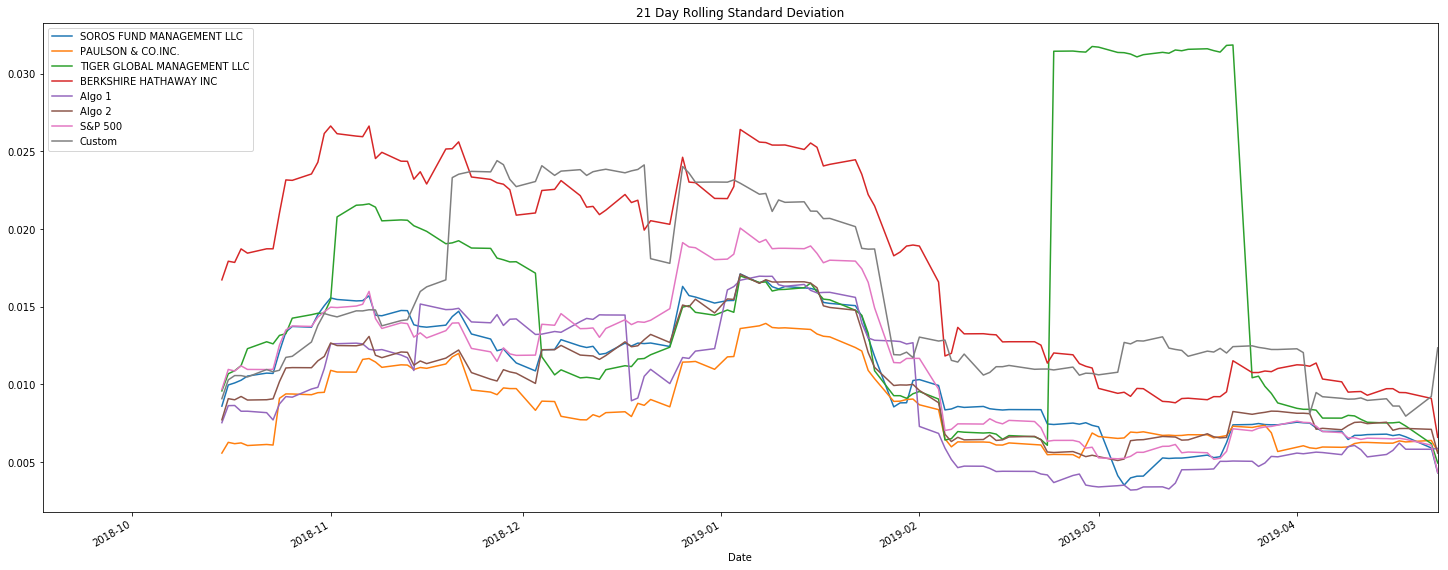

In [53]:
# Rolling
# YOUR CODE HERE
merged_custom_df.rolling(window=21).std().plot(figsize = (25,10), title = '21 Day Rolling Standard Deviation')

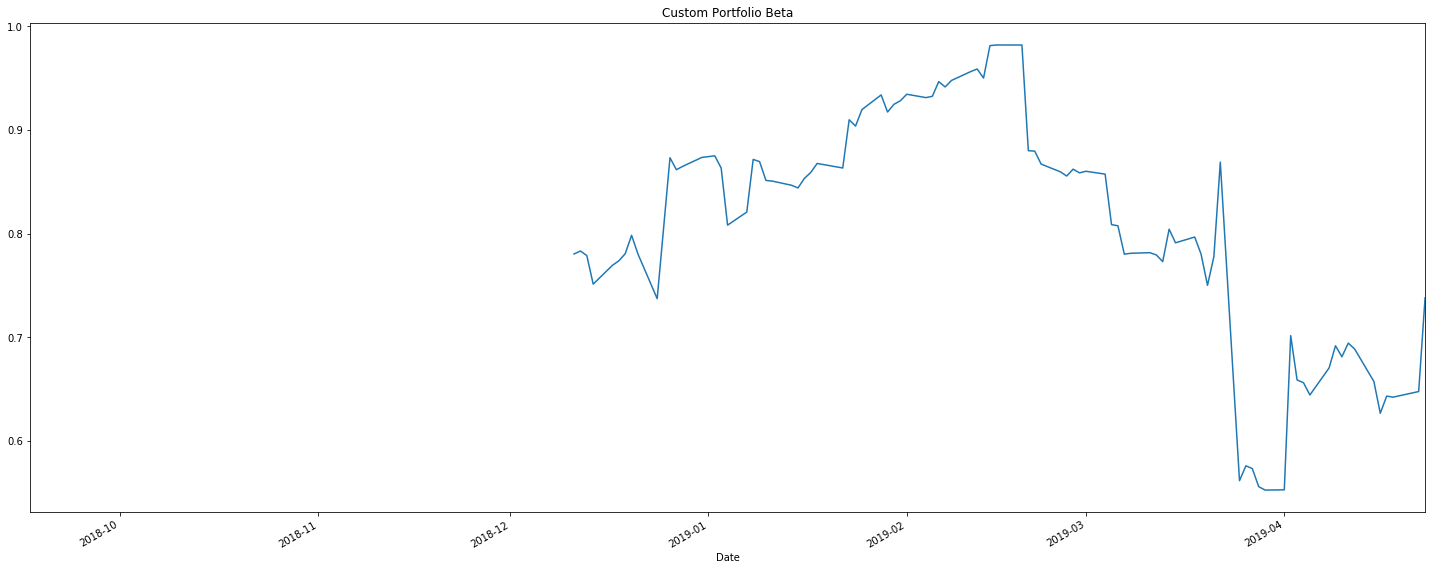

In [58]:
# Beta
# YOUR CODE HERE
merged_custom_df['rolling_covariance'] = merged_custom_df['Custom'].rolling(window = 60).cov(merged_df['S&P 500'])
merged_custom_df['rolling_variance'] = merged_custom_df['S&P 500'].rolling(window = 60).var()
merged_custom_df['rolling_beta'] = merged_custom_df['rolling_covariance']/merged_custom_df['rolling_variance']

merged_custom_df['rolling_beta'].plot(figsize = (25,10), title = 'Custom Portfolio Beta')

In [55]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratio = (merged_custom_df.mean() * 252) / (merged_custom_df.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.268072
PAULSON & CO.INC.             -0.433584
TIGER GLOBAL MANAGEMENT LLC   -1.706563
BERKSHIRE HATHAWAY INC         0.617655
Algo 1                         2.592985
Algo 2                        -0.225238
S&P 500                        0.181154
Custom                         0.069895
dtype: float64

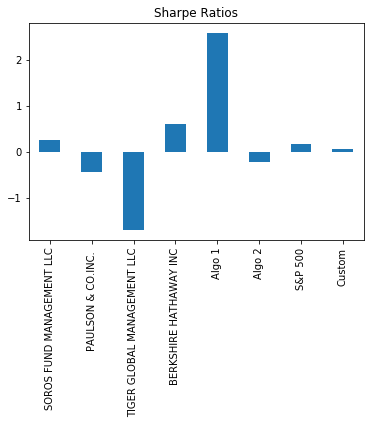

In [56]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratio.plot(kind = 'bar', title = "Sharpe Ratios")

## Include correlation analysis to determine which stocks (if any) are correlated

In [57]:
# YOUR CODE HERE
merged_custom_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.819823,0.487520,0.853165,0.391152,0.881430,0.894969,0.508353
PAULSON & CO.INC.,0.819823,1.000000,0.478911,0.704216,0.436635,0.825978,0.793014,0.466805
TIGER GLOBAL MANAGEMENT LLC,0.487520,0.478911,1.000000,0.349496,0.165415,0.404113,0.487296,0.316068
BERKSHIRE HATHAWAY INC,0.853165,0.704216,0.349496,1.000000,0.399863,0.820409,0.882108,0.462745
Algo 1,0.391152,0.436635,0.165415,0.399863,1.000000,0.438933,0.344039,0.124488
Algo 2,0.881430,0.825978,0.404113,0.820409,0.438933,1.000000,0.893600,0.526752
S&P 500,0.894969,0.793014,0.487296,0.882108,0.344039,0.893600,1.000000,0.574579
Custom,0.508353,0.466805,0.316068,0.462745,0.124488,0.526752,0.574579,1.000000
